In [254]:
import pandas as pd 
import sklearn.preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [255]:
data=pd.read_pickle('NewData.pkl')

We put the gender information as a boolean feature where it is $0$ if the `MostCommonGender` is a male, and $1$ if it is a female. 

We set back the indexes of the dataframes to numerical values in order to be able to work properly with the data.

In [256]:
data.reset_index(inplace=True)
data=data[['N_Transactions','N_Transaction_100','AverageAmount','Average Balance','Utilisation','MostCommonGender','MostFreqLocation','MaxTransaction','MinTransaction','MostFreqTime','AverageAge','Day_of_Week','Month','Month_Higher_Balance','MoreMoneyLoc','Season','SexChange','Period','Section','RichPoor','Volatile_Balance','LogCustAccountBalance','Increment','TotalTransactions','Num_Cities','NightTransactions']]

From now on, we will consider that the row $i$ refers to the data of the customerID in the $i-th$ position in the previous indexes.

In [257]:
data

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MostCommonGender,MostFreqLocation,MaxTransaction,MinTransaction,MostFreqTime,...,SexChange,Period,Section,RichPoor,Volatile_Balance,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions
0,2,2,2553.0,76340.635,73787.635,F,CHENNAI,4750,356,12,...,1,Night,Retired,Poor,0,5.1838,87679.81,5106,2,1
1,1,1,1499.0,24204.490,22705.490,M,MOHALI,1499,1499,20,...,0,Night,Adult,Poor,0,4.3839,0.00,1499,1,0
2,2,2,727.5,100112.950,99385.450,F,DELHI,1205,250,15,...,1,Night,Retired,Rich,0,5.3015,123471.62,1455,2,1
3,1,1,30.0,496.180,466.180,F,GURGAON,30,30,17,...,0,Night,Adult,Poor,0,2.6956,0.00,30,1,0
4,1,1,5000.0,87058.650,82058.650,M,DELHI,5000,5000,14,...,0,Night,Adult,Poor,0,4.9398,0.00,5000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,1,1,590.0,8752.390,8162.390,M,BANGALORE,590,590,13,...,0,Night,Adult,Poor,0,3.9421,0.00,590,1,0
879353,1,1,691.0,133067.230,132376.230,M,HAORA,691,691,0,...,0,Night,Adult,Rich,0,5.1241,0.00,691,1,1
879354,1,1,222.0,96063.460,95841.460,M,PUNE,222,222,12,...,0,Night,Adult,Poor,0,4.9826,0.00,222,1,0
879355,1,1,126.0,5559.750,5433.750,M,BANGALORE,126,126,12,...,0,Night,Adult,Poor,0,3.7451,0.00,126,1,0


We define a function to select the features that are numerical:

In [258]:
def no_categorical(df):
    no_object_df = df.select_dtypes(exclude = 'object') 
    return no_object_df

In [259]:
numdata=no_categorical(data)

In [260]:
numdata

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MaxTransaction,MinTransaction,MostFreqTime,AverageAge,SexChange,Volatile_Balance,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions
0,2,2,2553.0,76340.635,73787.635,4750,356,12,66.0,1,0,5.1838,87679.81,5106,2,1
1,1,1,1499.0,24204.490,22705.490,1499,1499,20,28.0,0,0,4.3839,0.00,1499,1,0
2,2,2,727.5,100112.950,99385.450,1205,250,15,66.0,1,0,5.3015,123471.62,1455,2,1
3,1,1,30.0,496.180,466.180,30,30,17,28.0,0,0,2.6956,0.00,30,1,0
4,1,1,5000.0,87058.650,82058.650,5000,5000,14,28.0,0,0,4.9398,0.00,5000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,1,1,590.0,8752.390,8162.390,590,590,13,28.0,0,0,3.9421,0.00,590,1,0
879353,1,1,691.0,133067.230,132376.230,691,691,0,28.0,0,0,5.1241,0.00,691,1,1
879354,1,1,222.0,96063.460,95841.460,222,222,12,28.0,0,0,4.9826,0.00,222,1,0
879355,1,1,126.0,5559.750,5433.750,126,126,12,28.0,0,0,3.7451,0.00,126,1,0


In [261]:
numdata.describe()

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MaxTransaction,MinTransaction,MostFreqTime,AverageAge,SexChange,Volatile_Balance,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions
count,879357.000000,879357.00000,8.793570e+05,8.793570e+05,8.793570e+05,8.793570e+05,8.793570e+05,879357.000000,879357.000000,879357.000000,879357.000000,879357.000000,8.793570e+05,8.793570e+05,879357.000000,879357.000000
mean,1.184517,1.11345,1.566734e+03,1.147151e+05,1.131484e+05,1.777717e+03,1.374435e+03,15.418461,33.347005,0.067482,0.089283,4.208273,6.133945e+02,1.854996e+03,1.173211,0.240144
std,0.448954,0.49441,6.433249e+03,8.010842e+05,8.007328e+05,7.107526e+03,6.243189e+03,5.125049,13.243177,0.250855,0.285153,1.088013,5.002734e+05,7.188314e+03,0.431113,0.447040
min,1.000000,0.00000,0.000000e+00,0.000000e+00,-1.517546e+06,0.000000e+00,0.000000e+00,0.000000,26.000000,0.000000,0.000000,-2.000000,-8.224243e+07,0.000000e+00,1.000000,0.000000
25%,1.000000,1.00000,1.905000e+02,5.591270e+03,4.753320e+03,2.000000e+02,1.300000e+02,12.000000,28.000000,0.000000,0.000000,3.778200,0.000000e+00,2.000000e+02,1.000000,0.000000
50%,1.000000,1.00000,5.000000e+02,1.866578e+04,1.754926e+04,5.000000e+02,3.750000e+02,16.000000,28.000000,0.000000,0.000000,4.326700,0.000000e+00,5.330000e+02,1.000000,0.000000
75%,1.000000,1.00000,1.241000e+03,6.154197e+04,5.981068e+04,1.408000e+03,1.000000e+03,20.000000,28.000000,0.000000,0.000000,4.867400,0.000000e+00,1.500000e+03,1.000000,0.000000
max,6.000000,6.00000,1.560034e+06,1.150355e+08,1.150339e+08,1.560034e+06,1.560034e+06,23.000000,66.000000,1.000000,1.000000,8.216100,1.150344e+08,1.560034e+06,6.000000,4.000000


In [262]:
norm_data=pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(numdata))

In [263]:
norm_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.816407,1.793148,0.153308,-0.047903,-0.049156,0.418188,-0.163127,-0.667011,2.465648,3.717352,-0.313108,0.896613,0.174038,0.452263,1.917804,1.699753
1,-0.410992,-0.229465,-0.010529,-0.112985,-0.112950,-0.039214,0.019952,0.893951,-0.403756,-0.269009,-0.313108,0.161420,-0.001226,-0.049524,-0.401776,-0.537187
2,1.816407,1.793148,-0.130453,-0.018228,-0.017188,-0.080579,-0.180106,-0.081650,2.465648,3.717352,-0.313108,1.004792,0.245582,-0.055645,1.917804,1.699753
3,-0.410992,-0.229465,-0.238874,-0.142581,-0.140724,-0.245897,-0.215344,0.308590,-0.403756,-0.269009,-0.313108,-1.390308,-0.001226,-0.253884,-0.401776,-0.537187
4,-0.410992,-0.229465,0.533676,-0.034524,-0.038827,0.453362,0.580724,-0.276770,-0.403756,-0.269009,-0.313108,0.672351,-0.001226,0.437517,-0.401776,-0.537187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,-0.410992,-0.229465,-0.151826,-0.132274,-0.131113,-0.167107,-0.125647,-0.471891,-0.403756,-0.269009,-0.313108,-0.244642,-0.001226,-0.175980,-0.401776,-0.537187
879353,-0.410992,-0.229465,-0.136126,0.022909,0.024013,-0.152897,-0.109469,-3.008453,-0.403756,-0.269009,-0.313108,0.841743,-0.001226,-0.161929,-0.401776,1.699753
879354,-0.410992,-0.229465,-0.209029,-0.023283,-0.021614,-0.218883,-0.184591,-0.667011,-0.403756,-0.269009,-0.313108,0.711689,-0.001226,-0.227174,-0.401776,-0.537187
879355,-0.410992,-0.229465,-0.223951,-0.136260,-0.134520,-0.232390,-0.199968,-0.667011,-0.403756,-0.269009,-0.313108,-0.425706,-0.001226,-0.240529,-0.401776,-0.537187


In [265]:
pca=PCA(n_components=16)
dataPCA=pca.fit_transform(norm_data)
variances=(pca.explained_variance_ratio_)
print(variances)
print(np.sum(pca.explained_variance_ratio_))

[2.86010139e-01 2.38210891e-01 1.29666043e-01 7.13690077e-02
 6.23054744e-02 5.68617446e-02 5.02855905e-02 3.65587700e-02
 2.89918558e-02 2.03961910e-02 1.02851063e-02 7.22157764e-03
 1.64779141e-03 1.31437320e-04 5.83804760e-05 1.35883170e-24]
0.9999999999999999


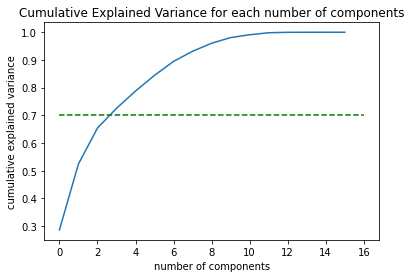

In [266]:
plt.plot(np.cumsum(variances))
plt.hlines(0.7,xmin=0,xmax=16,colors='green',linestyles='--')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for each number of components')
plt.show()

Hence, we observe that by selecting only the 5 features with more variance, we obtain a fraction of our dataset that retains more than the $70\%$ of the variance. In fact,

In [269]:
pca=PCA(n_components=5)
dataPCA=pca.fit_transform(norm_data)
variances=(pca.explained_variance_ratio_)
print(variances)
print(np.sum(pca.explained_variance_ratio_))

[0.28601014 0.23821089 0.12966604 0.07136901 0.06230547]
0.7875615549750625


Observe that we only we obtain the $78.76\%$ of the total variance. And the data obtained is:

In [270]:
pca_data=pd.DataFrame(dataPCA)
pca_data.head()

,0,1,2,3,4
0,4.817054,-0.586794,-0.277843,0.201062,0.247229
1,-0.832107,0.150922,-0.039666,0.378790,-0.134573
2,4.690688,-1.213728,-0.135045,0.637628,0.254586
3,-1.212687,-0.327942,-0.404314,-0.029126,0.239815
4,-0.540078,1.187824,0.083150,-0.502009,-0.181859


Now we match the inital data that we had with the one we have obtained from PCA to see which feature are we selecting as the ones mantaining the most variance among them all.

In [271]:
final_data = data.join(pca_data) 
final_data

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MostCommonGender,MostFreqLocation,MaxTransaction,MinTransaction,MostFreqTime,...,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions,0,1,2,3,4
0,2,2,2553.0,76340.635,73787.635,F,CHENNAI,4750,356,12,...,5.1838,87679.81,5106,2,1,4.817054,-0.586794,-0.277843,0.201062,0.247229
1,1,1,1499.0,24204.490,22705.490,M,MOHALI,1499,1499,20,...,4.3839,0.00,1499,1,0,-0.832107,0.150922,-0.039666,0.378790,-0.134573
2,2,2,727.5,100112.950,99385.450,F,DELHI,1205,250,15,...,5.3015,123471.62,1455,2,1,4.690688,-1.213728,-0.135045,0.637628,0.254586
3,1,1,30.0,496.180,466.180,F,GURGAON,30,30,17,...,2.6956,0.00,30,1,0,-1.212687,-0.327942,-0.404314,-0.029126,0.239815
4,1,1,5000.0,87058.650,82058.650,M,DELHI,5000,5000,14,...,4.9398,0.00,5000,1,0,-0.540078,1.187824,0.083150,-0.502009,-0.181859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,1,1,590.0,8752.390,8162.390,M,BANGALORE,590,590,13,...,3.9421,0.00,590,1,0,-0.972510,-0.130858,-0.127072,-0.640622,0.009153
879353,1,1,691.0,133067.230,132376.230,M,HAORA,691,691,0,...,5.1241,0.00,691,1,1,-0.537152,-0.146333,0.301511,-1.104732,-0.065782
879354,1,1,222.0,96063.460,95841.460,M,PUNE,222,222,12,...,4.9826,0.00,222,1,0,-0.810131,-0.195286,0.264726,-0.807159,-0.211282
879355,1,1,126.0,5559.750,5433.750,M,BANGALORE,126,126,12,...,3.7451,0.00,126,1,0,-1.034822,-0.271912,-0.160172,-0.784210,0.055821


In [272]:
final_data.to_csv('PCA_Data.csv',sep='\t')
final_data.to_pickle('PCA_Data.pkl')

## 2.3.- Clustering

Now we will give our own implementation of **K-Means** using MapReduce to compute the clusters of our data.

We will do as follows:

Given the data `D`, the number of clusters we are looking for `n`. 

- We will randomly select `n` points from our data as our initial centroids: $\{\mu_1,\cdots,\mu_n\}$.
- For all point in our data, we compute the square distance to all the centroids. 
- We pick the minimum among them and assign that point to the same cluster as that centroid.
- Once we have all the points assigned to the data, we will compute the new centroids by taking the average of all point in the same cluster.

We will iterate the procedure `k` times or stop as soon as the centroids have converged :$$|CentroidNew_i-CentroidOld_i|<10^{-2},\forall i \in \{1,\cdots,n\}$$

In [274]:
#Distance functions implemented in here
from scipy.spatial import distance